### Roboflow Inference

In [1]:
!pip install inference-sdk

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/181.5 kB ? eta -:--:--
   --------------------------------------- 181.5/181.5 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.74
    Uninstalling opencv-python-4.8.0.74:
      Successfully uninstalled opencv-python-4.8.0.74
  Attempting uninstall: supervision
    Found existing installation: supervision 0.18.0
    Uninstalling supervision-0.18.0:
      Successfully uninstalled supervision-0.18.0


DEPRECATION: Loading egg at c:\users\omolp094\appdata\local\programs\python\python311\lib\site-packages\pybluez-0.30-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\omolp094\appdata\local\programs\python\python311\lib\site-packages\sleeppy-0.2.21-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.19 requires opencv-python-headless==4.8.0.74, which is not installed.
roboflow 1.1.19 requires certifi==2023.7.22, but you have certifi 2024.2.2 which is incompat

In [1]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="31LzRIsGrdtRzoGuITTN"
)
test_img = r"C:\Users\OMOLP094\Desktop\WORK_FROM_NOV_2024\obstacle_detection_swimmers_open_waters\test_images\swimmer_3.jpg"

result = CLIENT.infer(test_img, model_id="seadronessee-odv2/11")

In [2]:
result

{'inference_id': 'fb7c5ebd-2878-42ea-8e11-39457bf66318',
 'time': 0.056907402999968326,
 'image': {'width': 1280, 'height': 853},
 'predictions': [{'x': 121.0,
   'y': 647.0,
   'width': 12.0,
   'height': 8.0,
   'confidence': 0.570825457572937,
   'class': 'swimmer',
   'class_id': 4,
   'detection_id': '8a5c5e0c-c6f0-44cb-9333-4b49ae3fdef1'},
  {'x': 405.5,
   'y': 649.5,
   'width': 11.0,
   'height': 7.0,
   'confidence': 0.5684796571731567,
   'class': 'swimmer',
   'class_id': 4,
   'detection_id': 'bdf87149-ffba-46c2-b9a0-b49d8313083f'},
  {'x': 450.5,
   'y': 649.0,
   'width': 9.0,
   'height': 8.0,
   'confidence': 0.4696033298969269,
   'class': 'swimmer',
   'class_id': 4,
   'detection_id': 'fb165ce4-9cbd-4036-a2eb-887b059a10b1'},
  {'x': 58.5,
   'y': 640.5,
   'width': 13.0,
   'height': 11.0,
   'confidence': 0.4667433798313141,
   'class': 'swimmer',
   'class_id': 4,
   'detection_id': '3d6f4594-47ed-4d42-8daf-b3f81b5f7bf7'},
  {'x': 761.5,
   'y': 437.0,
   'width':

In [3]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [4]:
# Open the image
image = Image.open(test_img)
draw = ImageDraw.Draw(image)

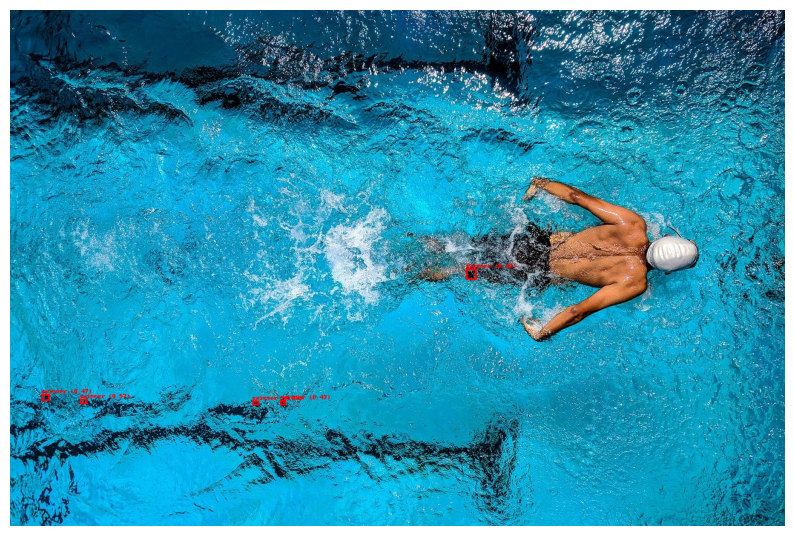

In [5]:
# Parse the detections
detections = result["predictions"]  # Ensure the key is correct in the response JSON
for detection in detections:
    x, y, width, height = (
        detection["x"],
        detection["y"],
        detection["width"],
        detection["height"],
    )
    class_name = detection["class"]
    confidence = detection["confidence"]

    # Calculate bounding box coordinates
    left = x - width / 2
    top = y - height / 2
    right = x + width / 2
    bottom = y + height / 2

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=3)

    # Add label and confidence score
    label = f"{class_name} ({confidence:.2f})"
    draw.text((left, top - 10), label, fill="red")

# Show the image with detections
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

# Optionally save the image with detections
image.save("detections_result.jpg")